In [1]:
# read the path file with python
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
# import tensorflow as tf
# import tensorflow.keras as keras
import math
# from scipy.optimize import fsolve
# from scipy.optimize import root
from scipy.optimize import minimize
from scipy import signal
from scipy import linalg
import scipy as scipy
# import scipy as scp
# import sympy as  syp
# from tensorflow.keras import backend as K
# from tensorflow.keras.layers import Layer
# from tensorflow.keras.models import Sequential
import gc
import struct

In [2]:
l=[]
a = []
h = []
del l,a,h
q = 0
with open("data_1\\path.dat", "rb") as file0:
    data1 = file0.read(4)
    I = struct.unpack("i", data1)[0]
    data1 = file0.read(4)
    J = struct.unpack("i", data1)[0]
    data1 = file0.read(4)
    K = struct.unpack("i", data1)[0]
    h = []
    for i in range(I):
        a = []
        for j in range(J):
            l = []
            while(1):
                data1 = file0.read(4)
                f = struct.unpack("4s",data1)[0]
                if (f!=b'end\x00'):
                    f = struct.unpack("f",data1)[0]
                    l.append(f)
                else:
                    break
            
            a.append(l)
        h.append(a)
            

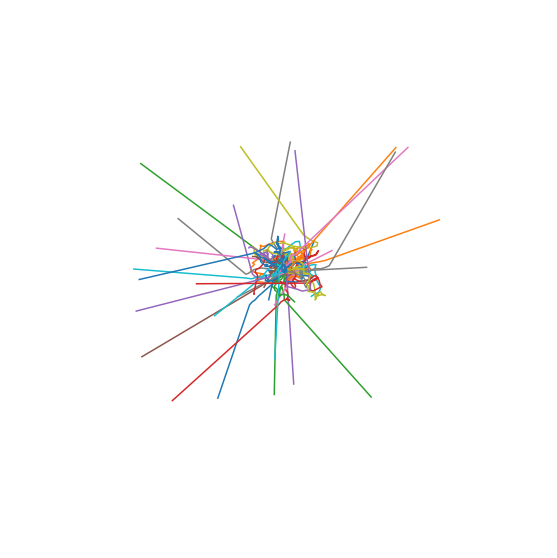

In [3]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
for i in range(int(I/20)):
    # Data for a three-dimensional line
    zline = h[i][0]
    xline = h[i][1]
    yline = h[i][2]
    ax.view_init(0, 0)
    ax.plot3D(xline, yline, zline)
plt.axis('off')
plt.show()

In [4]:
eye = [0.0375,0.03,0.0375]
#normal line vector (0.707,0.707,0)
#euqation of surface : x+y=0.09
N=480
time = np.linspace(1e-12, 480e-12, num=N)
weight = np.zeros((N,))
temp = pow(2,0.5)
threshold = 75e-3
for i in range(I):
    for k in range(len(h[i][0])):
        
        if((pow(h[i][0][k]-eye[0],2)+pow(h[i][1][k]-eye[1],2)
           +pow(h[i][2][k]-eye[2],2) < pow(0.1*threshold,2)) and 
           (abs(h[i][1][k]-eye[1])<0.05*threshold)):
            
            for t in range(N):
                if(h[i][4][k]>=time[t]and(h[i][4][k]<time[t+1])):
                    weight[t]=weight[t]+h[i][3][k]
            # break;
            
        


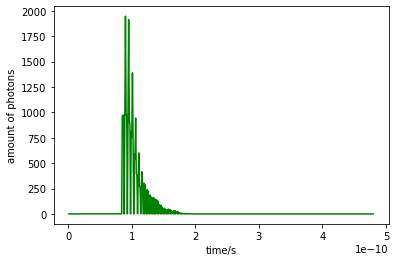

In [5]:
# plt.scatter(time,weight)

plt.plot(time,weight,color="green")
plt.xlabel('time/s')
plt.ylabel('amount of photons')
plt.show()

In [6]:
class process_hyperspec(object):
    
    def __init__(self, path, scat):
        self.path = path
        self.scat = scat
        
    def read_data(self):
        ## Read data from txt
        data=pd.read_fwf(self.path, dtype = object, header = None)## Read data as Pandas DataFrame
        data_8 = data.loc[8,:].str[6:] ## Select data of column of wavelengths

        data_nm_dataframe =pd.read_csv(StringIO(data_8[0]))

        with open(self.path,'r',encoding='utf-8') as f:
            content = f.read()

        flag = 0
        for index in range(len(content)):##find the start point  of time and intensity data, pointer is the 'index'
            if (content[index] == '\n') and (flag != 9):
                flag = flag + 1
            elif (content[index] == '\n') and (flag == 9):
                break
            else:
                continue

        data_ns = pd.read_csv(StringIO(content[index:len(content)]), names = data_nm_dataframe.columns[0:len(set(data_nm_dataframe))]) ## Read data of time and gray 
        img_nm_ns = np.array(data_ns)    ## Transform to numpy array                                image as DataFrame; names is a 640x0 array indicates the wavelengths range
        
        self.data_frame = data_ns
        self.data_array = img_nm_ns
        
    def cal_846nm(self):
        time_total, wavelength_total = self.data_array.shape ## Generate an array contains intensity versus time data on 846nm
        data_846nm = np.zeros((time_total,), dtype = float )
        for i in range(wavelength_total):
            data_846nm = self.data_array[:,i] + data_846nm

        return data_846nm/wavelength_total
    
    def return_dataframe(self):
        
        return self.data_frame
    
    def return_array(self):
        return self.data_array

In [7]:
def name_g(i):
    if(i<=4 and i>=0):
        return  '0'+str(2*i+1)
    elif(i>4):
        return str(2*i+1)
    else:
        return None
    

dict1 = {i:'hyperspec1\\t5ns_scat'+ name_g(i) +'_abs_00.txt' for i in range(0, 8)}
dict1[-1] = 'hyperspec1\\ref_real_5ns.txt'


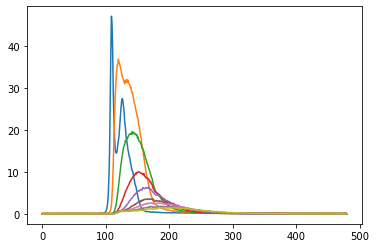

In [8]:
scat = [None]*9
data_480multi9 = np.zeros((9,480), dtype = float)
for i in range(0,9):
    scat[i] = process_hyperspec(dict1[i-1], i)
    scat[i].read_data()
    data_480multi9[i,:] = scat[i].cal_846nm()

time_index = scat[0].return_dataframe().index
plt.figure('ns/nm')
for i in range(0,9):
    plt.plot(data_480multi9[i,:])
    
plt.show()
    

In [9]:
y = np.convolve(weight/max(weight),data_480multi9[0])
y1 = y/max(y)
d1 = data_480multi9[1]/max(data_480multi9[1])

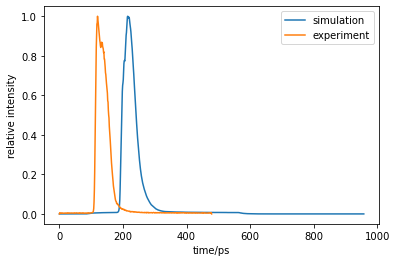

In [10]:
l1, = plt.plot(y1)
l2, = plt.plot(d1)
plt.legend([l1, l2]
           , ['simulation','experiment'])
plt.xlabel('time/ps')
plt.ylabel('relative intensity')
plt.show()

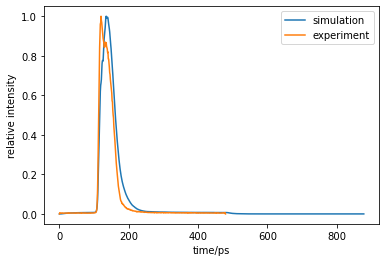

In [11]:
l1, = plt.plot(y1[80:])
l2, = plt.plot(d1)
plt.legend([l1, l2]
           , ['simulation','experiment'])
plt.xlabel('time/ps')
plt.ylabel('relative intensity')
plt.show()